## 객체지향으로 만들어보기 (전처리 + dto, dao)

In [ ]:
import com_sba_api.util.file import FileReader

import numpy as np
import pandas as pd

from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def __init__(self):
    self.fileReader = FileReader()
    self.data = os.path.join(os.path.abspath(os.path.dirname(__file__))+'/data')
    self.odf = None

def hook(self):
    train = 'user_train.csv'
    test = 'user_test.csv'
    this = self.fileReader
    this.train = self.new_model(train)
    this.test = self.new_model(test)
    
    '''
    Original Model Generation
    '''
    
    self.odf = pd.DataFrame(
        {
            'user_id' : this.train.user_id,
            'password' : '1'
            
        }
    
    )
    
    this.id = this.test['user_id']
    this = self.drop_feature(this, '')
    
def fileread():
    cheese_data = pd.read_csv("com_cheese_api/user/data/users.csv")
    cheese_df = cheese_data.loc[:,['cheese_name']]

    cheese_lists = np.array(cheese_df['cheese_name'].tolist())
    return cheese_lists
    
def make_wordcloud(word_count):
    okt = Okt()
    
    sentences_tag = []
    
    #형태소 분석하여 리스트에 넣기
    for sentence in fileread():
        morph = okt.pos(sentence)
        sentences_tag.append(morph)
        #print(morph)
        #print('-' * 30)
    
    #print(sentences_tag)
    #print('\n' * 3)
    
    noun_adj_list = []
    #명사와 형용사만 구분하여 이스트에 넣기
    for sentence1 in sentences_tag:
        for word, tag in sentence1:
            if tag in ['Noun', 'Adjective']:
                if len(word) >= 2:
                    noun_adj_list.append(word)
                    
    
    word_count_list = []
    #형태소별 count
    counts = Counter(noun_adj_list)
    tags = counts.most_common(word_count)
    word_count_list.append(tags)
    word_list = sum(word_count_list, [])
    print(word_list)
    print(type(word_list))
    
    
    # wordCloud 생성
    # 한글 깨지는 문제 해결하기 위해 font_path 지정
    wc = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf', background_color='white', width=800, height=600)
    #print(dict(tags))
    cloud = wc.generate_from_frequencies(dict(tags))
    plt.figure(figsize=(10, 8))
    plt.axis('off')
    plt.imshow(cloud)
    return plt.show()
    
#if __name__ == '__main__':
#    make_wordcloud(100)
make_wordcloud(100)

## 전처리 정리

### (1) 단어 빈도수 출력 & 워드클라우드 - 코드 정리 다시하기

In [46]:
cheese_data = pd.read_csv("com_cheese_api/user/data/users.csv")
cheese_df = cheese_data.loc[:,['cheese_name']]
cheese_lists = np.array(cheese_df['cheese_name'].tolist())
cheese_1 = ''.join(cheese_lists)
cheese_1

'가고시마 현미흑초 720㎖가고시마 현미흑초 720㎖신가네여주농장 여주즙 100ml 50팩 1박스 청정지역철원재배생산신가네여주농장 여주즙 100ml 50팩 1박스 청정지역철원재배생산새우볶음밥 270gCAVENDISH 캐빈디쉬 해쉬브라운 1.2kg신가네여주농장 여주즙 100ml 50팩 1박스 청정지역철원재배생산참치김치볶음밥 300g새우볶음밥 300g신가네여주농장 여주즙 100ml 50팩 1박스 청정지역철원재배생산올바른 석류즙 100포(실속포장)올바른 석류즙 100포(실속포장)CJ 한뿌리 홍삼 10입 (손잡이형) - 홍삼한뿌리CJ 한뿌리 홍삼 10입 (손잡이형) - 홍삼한뿌리글램카페 오리지널 2BOX (5g×30포×2박스/총60포)맥스 멀티비타민앤미네랄 포 틴 90정 2통(6개월분/청소년 종합비타민)맥스 멀티비타민앤미네랄 포 틴 90정 2통(6개월분/청소년 종합비타민)맥스 멀티비타민앤미네랄 포 틴 90정 2통(6개월분/청소년 종합비타민)맥스 멀티비타민앤미네랄 포 틴 90정 2통(6개월분/청소년 종합비타민)맥스 멀티비타민앤미네랄 포 틴 90정 2통(6개월분/청소년 종합비타민)맥스 칼슘 마그네슘 비타민D&C플러스 120캅셀x2통맥스 멀티비타민앤미네랄 포 틴 90정 2통(6개월분/청소년 종합비타민)유기농오분도미밥(210g)영동 거봉포도(공중부양박스) 4kg[초록마을] 착한농부참외(1kg)착한농부실속배(3~5입/봉)[초록마을] [기획]착한농부방울토마토두팩묶음(500g×2입)유기농오분도미밥(210g)찬마루 서울반가 포기김치(10kg) / 무료배송 - 서울반가  포기김치[초록마을] 착한농부참외(1.2kg)[아리알찬]아삭아삭 당도높은 신고배 7.5kg(14-15과)여에스더 유산균 프로바이오틱스 클래식 1병여에스더 유산균 프로바이오틱스 클래식 1병여에스더 유산균 프로바이오틱스 클래식 1병여에스더 유산균 프로바이오틱스 클래식 1병[#텐텐] VAP 항산화젤리 4주분 (14포*2)[#텐텐] VAP 항산화젤리 4주분 (14포*2)밀크시슬 Milk Thistle (60캡슐) - GNC 

[('비타민', 3964), ('김치', 3844), ('삼다수', 2608), ('풀무원', 2565), ('생수', 2474), ('제주', 2353), ('홍삼', 2286), ('유산균', 2084), ('캡슐', 2007), ('훈제', 1955), ('증정', 1913), ('사과', 1864), ('쇼핑', 1625), ('큐브', 1606), ('락토핏', 1557), ('고려', 1508), ('은단', 1501), ('야채', 1478), ('밸런스', 1400), ('라이트', 1257), ('홍진경', 1232), ('선물', 1200), ('간편', 1172), ('플러스', 1101), ('스테이크', 1071), ('도시락', 1015), ('롯데', 991), ('곤약', 987), ('멀티', 978), ('콜라겐', 969), ('라이프', 924), ('견과', 919), ('두유', 896), ('오메가', 883), ('네슬레', 858), ('아셉틱', 858), ('퓨어', 857), ('소시지', 846), ('청양고추', 815), ('칼슘', 801), ('젤리', 794), ('시래기', 764), ('솥밥', 764), ('표고버섯', 760), ('프리미엄', 744), ('건강', 711), ('포도', 668), ('우먼', 655), ('스틱', 653), ('종근당', 650), ('포장', 628), ('석류', 626), ('주스', 620), ('하루', 619), ('실속', 615), ('불고기', 614), ('만두', 611), ('백화점', 607), ('키즈', 592), ('자연', 587), ('볶음', 579), ('모음', 576), ('미니', 563), ('낱봉', 561), ('호두', 556), ('라이스', 554), ('마그네슘', 551), ('혼합', 542), ('루테', 539), ('영양', 538), ('볶음밥', 534), ('리지', 532), ('워터'

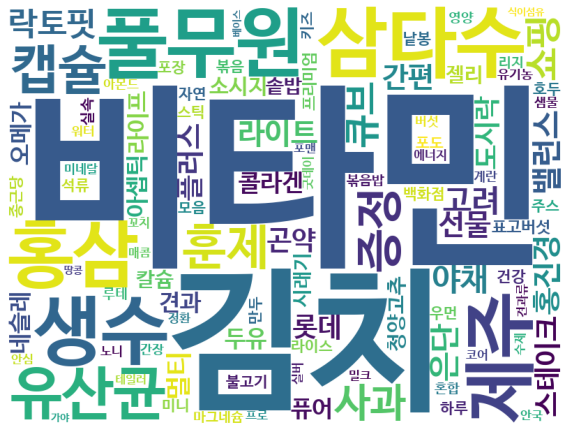

In [60]:
import numpy as np
import pandas as pd

from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#def read_stopword():
#    with open('com_cheese_api/user/data/stopword.txt', 'r') as file:
#        lines = file.readlines()
#        stop_str = ''.join(lines)
#        stopword = stop_str.replace('\n', ' ')
#    stopwords = stopword.split(' ')
#    return stopwords

def make_wordcloud():
    
    item_data = pd.read_csv("com_cheese_api/user/data/users.csv")
    item_df = item_data.loc[:,['cheese_name']]
    item_lists = np.array(item_df['cheese_name'].tolist())
            
    with open('com_cheese_api/user/data/stopword.txt', 'r') as file:
        lines = file.readlines()
        stop_str = ''.join(lines)
        stopword = stop_str.replace('\n', ' ')
    stopwords = stopword.split(' ')

    okt = Okt()
    sentences_tag = []
    
    #형태소 분석하여 리스트에 넣기
    for sentence in item_lists:
        morph = okt.pos(sentence)
        sentences_tag.append(morph)
        #print(morph)
        #print('-' * 30)
    
    #print(sentences_tag)
    #print('\n' * 3)
    
    noun_adj_list = []
    #명사와 형용사만 구분하여 이스트에 넣기
    for sentence1 in sentences_tag:
        for word, tag in sentence1:
            if word not in stopwords:
                if tag in ['Noun']:
                    if len(word) >= 2:
                        noun_adj_list.append(word)
                    
    
    word_count_list = []
    #형태소별 count
    counts = Counter(noun_adj_list)
    tags = counts.most_common(100)
    word_count_list.append(tags)
    word_list = sum(word_count_list, [])
    print(word_list)
    print(f'word item type : {type(word_list[0])}')
    print(type(word_list))
    
    
    # wordCloud 생성
    # 한글 깨지는 문제 해결하기 위해 font_path 지정
    wc = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf', background_color='white', width=800, height=600)
    #print(dict(tags))
    cloud = wc.generate_from_frequencies(dict(tags))
    plt.figure(figsize=(10, 8))
    plt.axis('off')
    plt.imshow(cloud)
    return plt.show()

make_wordcloud()

contains = 'data'
indata = 'testdata'



### (2) 치즈 상품으로 대체하기

In [82]:
item_data = pd.read_csv("com_cheese_api/user/data/users.csv")
item_df = item_data.loc[:,['cheese_name']]
item_lists = np.array(item_df['cheese_name'].tolist())

def items():
    item_list = []
    for item in range(len(item_lists)):
        item_list.append(item_lists[item])

    item_str = " ".join(item_list)
    return item_str

def 

<class 'str'>


In [ ]:
item_data = pd.read_csv("com_cheese_api/user/data/users.csv")
item_data = pd.read_csv("com_cheese_api/user/data/users.csv")
item_df = item_data.loc[:,['cheese_name']]
item_lists = np.array(item_df['cheese_name'].tolist())
            
#for change_item in range(len(cheese_lists)):
#    item_data.loc[df['cheese_name'] == ]

In [57]:
top_item = (['비타민', '김치', '삼다수', '풀무원', '생수', '제주', '홍삼', '유산균', '캡슐', '훈제', '증정', '사과', '쇼핑', '큐브', '락토핏', '고려', '은단', '야채', '밸런스', '라이트', '홍진경', '선물', '간편', '플러스', '스테이크', '도시락', '롯데', '곤약', '멀티', '콜라겐', '라이프','견과', '두유', '오메가', '네슬레', '아셉틱', '퓨어', '소시지', '청양고추', '칼슘', '젤리', '시래기', '솥밥', '표고버섯', '프리미엄', '건강', '포도', '우먼', '스틱', '종근당', '포장', '석류', '주스', '하루', '실속', '불고기', '만두', '백화점', '키즈', '자연', '볶음', '모음', '미니', '낱봉', '호두', '라이스', '마그네슘', '혼합', '루테', '영양', '볶음밥', '리지', '워터', '버섯', '샘물', '유기농', '아몬드', '계란', '간장','수제', '안국', '미네랄', '포맨', '노니', '정환', '에너지', '코어', '매콤', '실버', '굿데이', '견과류', '안심', '프로','밀크', '꼬치','테일러','식이섬유', '땅콩','가야','베이스'])
print(type(top_item))
%top_item[0]%

<class 'list'>


UsageError: Line magic function `%top_item[0]%` not found.


In [59]:
a = item_data.loc[item_data['cheese_name'] == '%비타민%', cheese_name] = cheese_lists[1]
a

NameError: name 'cheese_name' is not defined

In [67]:
item_data = pd.read_csv("com_cheese_api/user/data/users.csv")
#for num in range(len(cheese_lists)):
    
#for  in cheese_lists:
#    if 
#    item_data.loc[df['cheese_name'] == '%top_item[num]%', 'cheese_name'] = cheese_lists[num]

cheese_data = pd.read_csv("com_cheese_api/cheese/data/cheese_list.csv")
cheese_df = cheese_data.loc[:,['name']]
cheese_lists = np.array(cheese_df['name'].tolist())
cheese_lists

array(['[캐시밸리] 미국 전통 치즈 5종', '[안젤로] 고르곤졸라 피칸테', '[라 콘타디나] 버팔로 리코타',
       '[벨지오이오소] 모짜렐라 로그', '[브리미] 락토스프리 리코타', '[만토바] 그라나 파다노',
       '[브렐렛] 모짜렐라 카우', '[브리미] 락토스프리 모짜렐라', '[프리코] 에멘탈 슬라이스',
       '[샴피뇽] 캄보졸라 치즈', '[그랑도르즈] 베이크드 까망베르', '[란다나] 1000일 숙성 고다 치즈',
       '[싱글톤] 체더 치즈 2종', '[zott] 바질 모짜렐라 치즈', '[델리시아] 버팔로 모짜렐라',
       '[사토리] 샤도네이 벨라비타노', '[퀘소로시난테] 만체고 블랙 트러플 치즈', '[아그리폼] 페코리노 로마노',
       '[콜롬보] 모짜렐라', '[프란시아] 모짜렐라 카우', '[프리코] 에담 슬라이스',
       '[카스텔로] 덴마크 브리 치즈', '[리브와레 자카망] 대용량 콩테', '[라퀘유] 푸름 당베르',
       '[암브로시] 유기농 고르곤졸라', '[무르젤라] 이탈리아 부라타 120g', '[브리미] 보코치니',
       '[사토리] 메를로 벨라비타노', '[사토리] 헤리티지 체다', '[퀘소로시난테] 만체고 치즈 3개월',
       '[푸글리제] 리코타', '[소리] 버팔로 모짜렐라', '[퀘소로시난테] 만체고 치즈 12개월',
       '[델리지오사] 부라타 치즈', '[파르네세] 파르미지아노 레지아노', '[브리미] 모짜렐라 로그',
       '[파르네세] 파르미지아노 레지아노 24개월', '[나투라 신체라] 카우 모짜렐라',
       '[만토바] 파르미지아노 레지아노 22개월', '[프리코] 미니 에담 치즈', '[브리미] 리코타 치즈',
       '[아그리폼] 프로볼로네 돌체 포션치즈', '[랑세] 샤우르스', '[빔스터] 110년 전통 고다치즈 3종',
       '[아우리치오] 프로볼로네 치즈 3종', '[브

In [64]:
origin = 'TestData'
contains = 'Test'
contains2 = 'ajkldflas' 

if contains2 in origin:
    print('contains in origin')
else:
    print('contains not origin')

contains not origin
